Vanilla RNN의 한계를 극복하기 위한 다양한 RNN 번형이 나옴<br>
그 중 하나가 <big><b>LSTM</b></big>

# *Vanilla RNN 한계*

#### 장기 의존성 문제
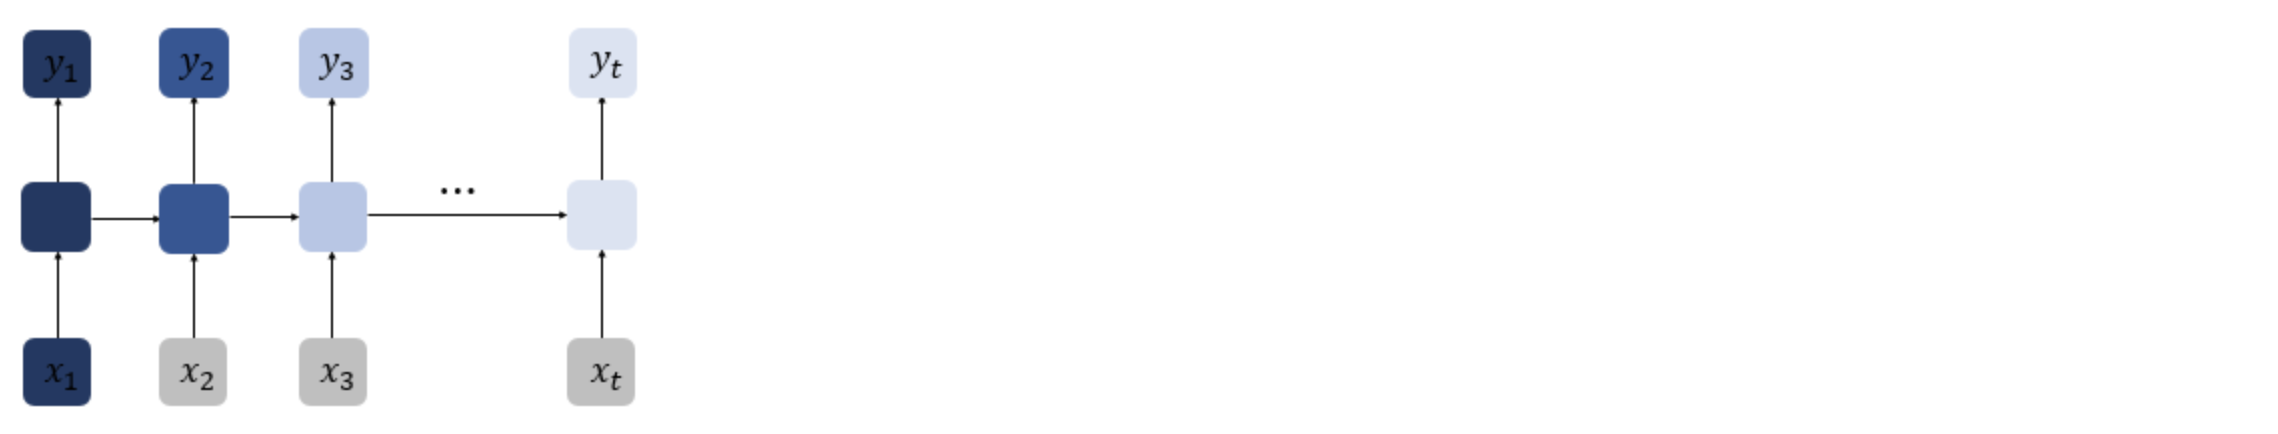
바닐라 RNN은 출력 결과가 이전 계산 결과에 의존<br>
비교적 짧은 시퀀스(Sequence)에 대해서만 효과를 보이는 단점이 있음<br>
바닐라 RNN의 시점(time step)이 길어질수록 앞의 정보가 뒤로 충분히 전달되지 못하는 현상 발생<br><br>
<b>왼쪽 남색 첫번째 입력 값 x1 정보량</b>에서 오른쪽으로 갈수록 <u>x1 정보량이 손실되어가는 과정</u>

# 

# *LSTM(Long Short-Term Memory)*

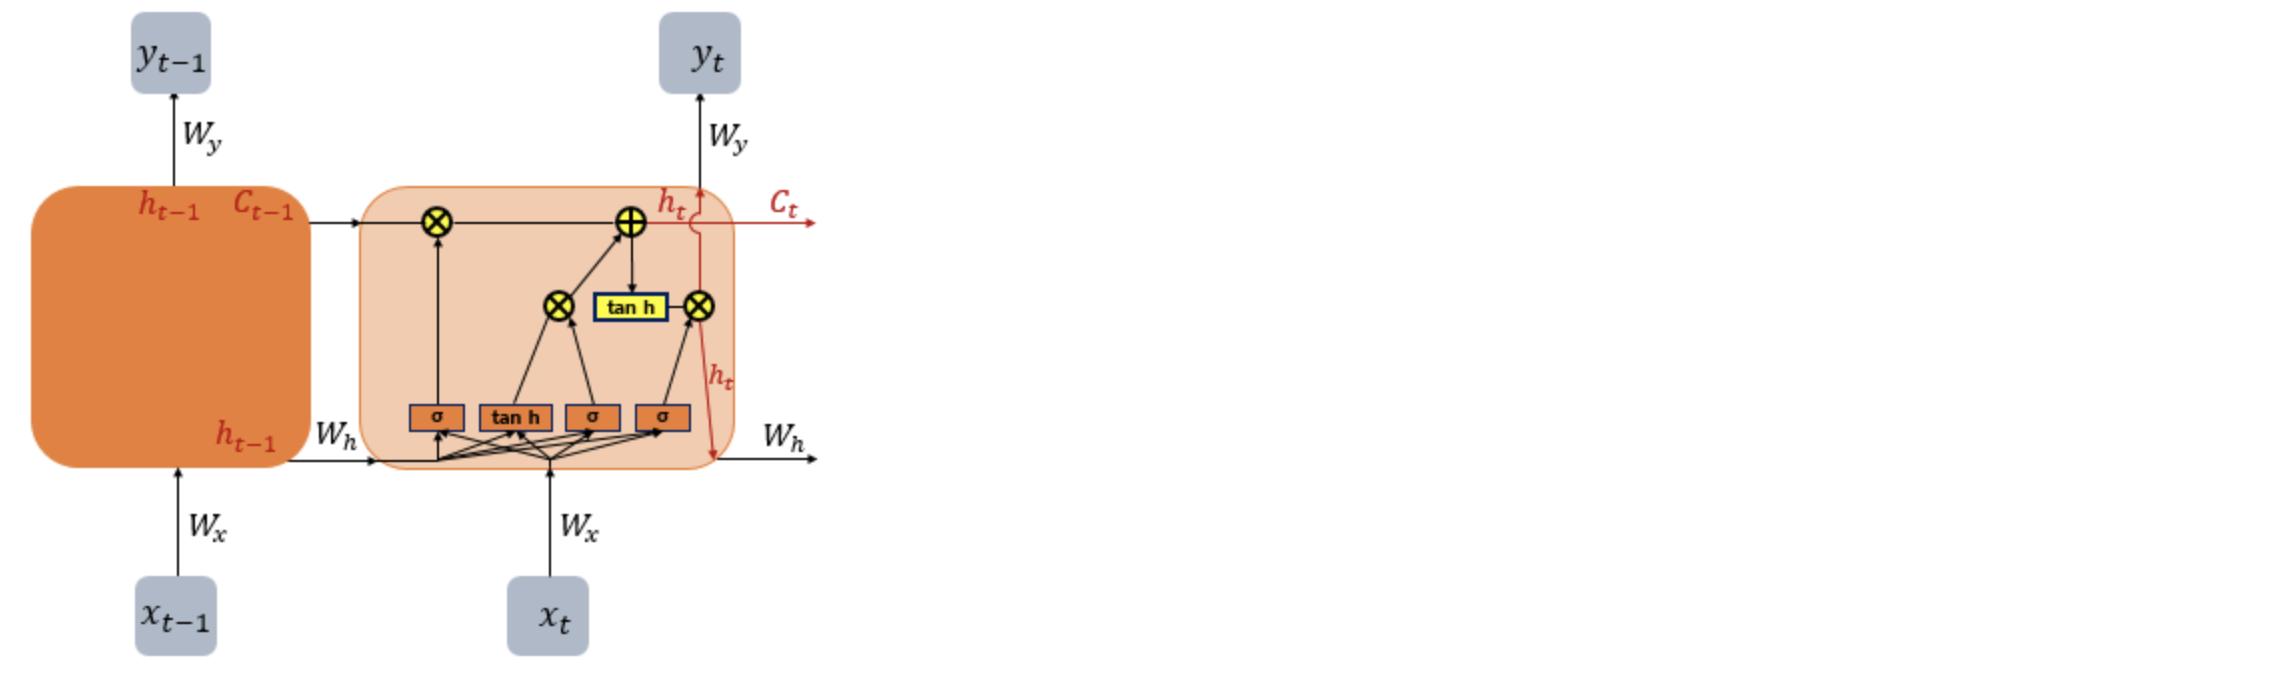
은닉층의 메모리 셀에 <b>입력 게이트, 망각 게이트, 출력 게이트</b>를 추가하여 <u>불필요한 기억을 지우고, 기억해야할 것들을 지정</u><br>
<b>LSTM</b>은 은닉 상태(hidden states)를 계산하는 식이 바닐라 RNN보다 좀 더 복잡해지고 <u>셀 상태(cell state)라는 값이 추가됨</u><br>
(t시점의 셀 상태를 Ct로 표현)<br><br>

### *1. 입력 게이트*
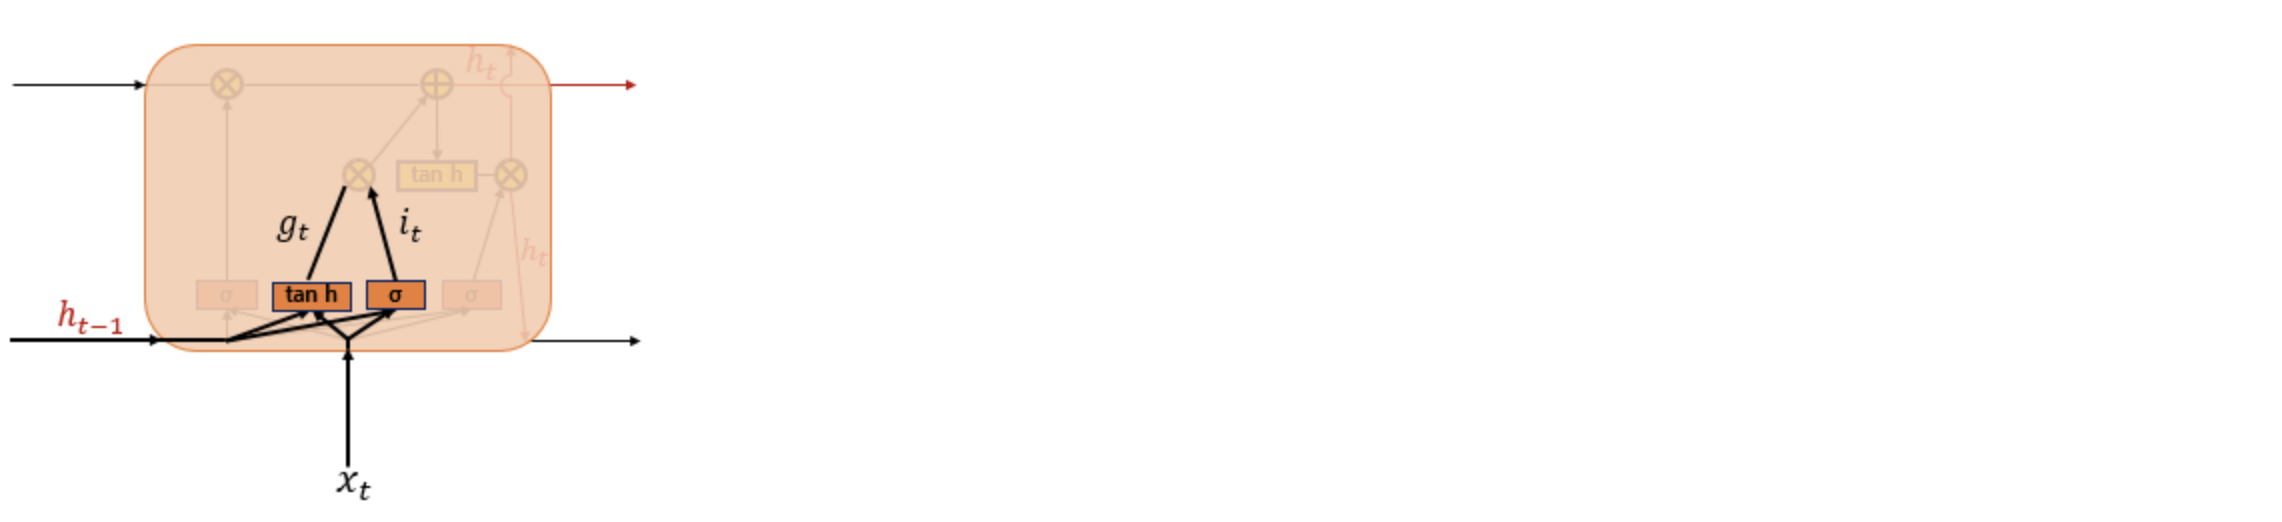
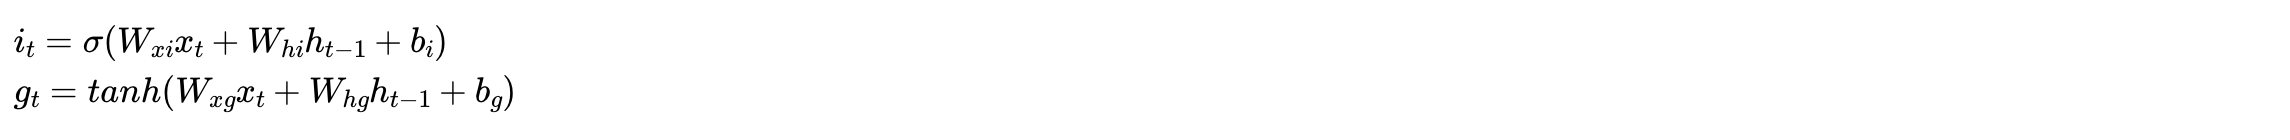
<br><b>입력 게이트는 현재 정보를 기억하기 위한 게이트</b><br>
현재 시점 t의 x값과 입력 게이트로 이어지는 가중치 Wxi를 곱한 값과 이전 시점 t-1의 은닉 상태가 입력 게이트로 이어지는 가중치 Whi를 곱한 값을 더하여 시그모이드 함수를 지남(it)<br><br>
현재 시점 t의 x값과 입력 게이트로 이어지는 가중치 Wxi를 곱한 값과 이전 시점 t-1의 은닉 상태가 입려게 게이트로 이어지는 가중치 Whg를 곱한 값을 더하여 하이버볼릭탄젠트 함수를 지남(gt)<br><br>
<u>시그모이드 함수를 지나 0,1 사이의 값과 하이버볼릭탄젠트 함수를 지나 -1,1 사이의 값 두 개가 나옴</u><br>

### *2. 삭제 게이트*
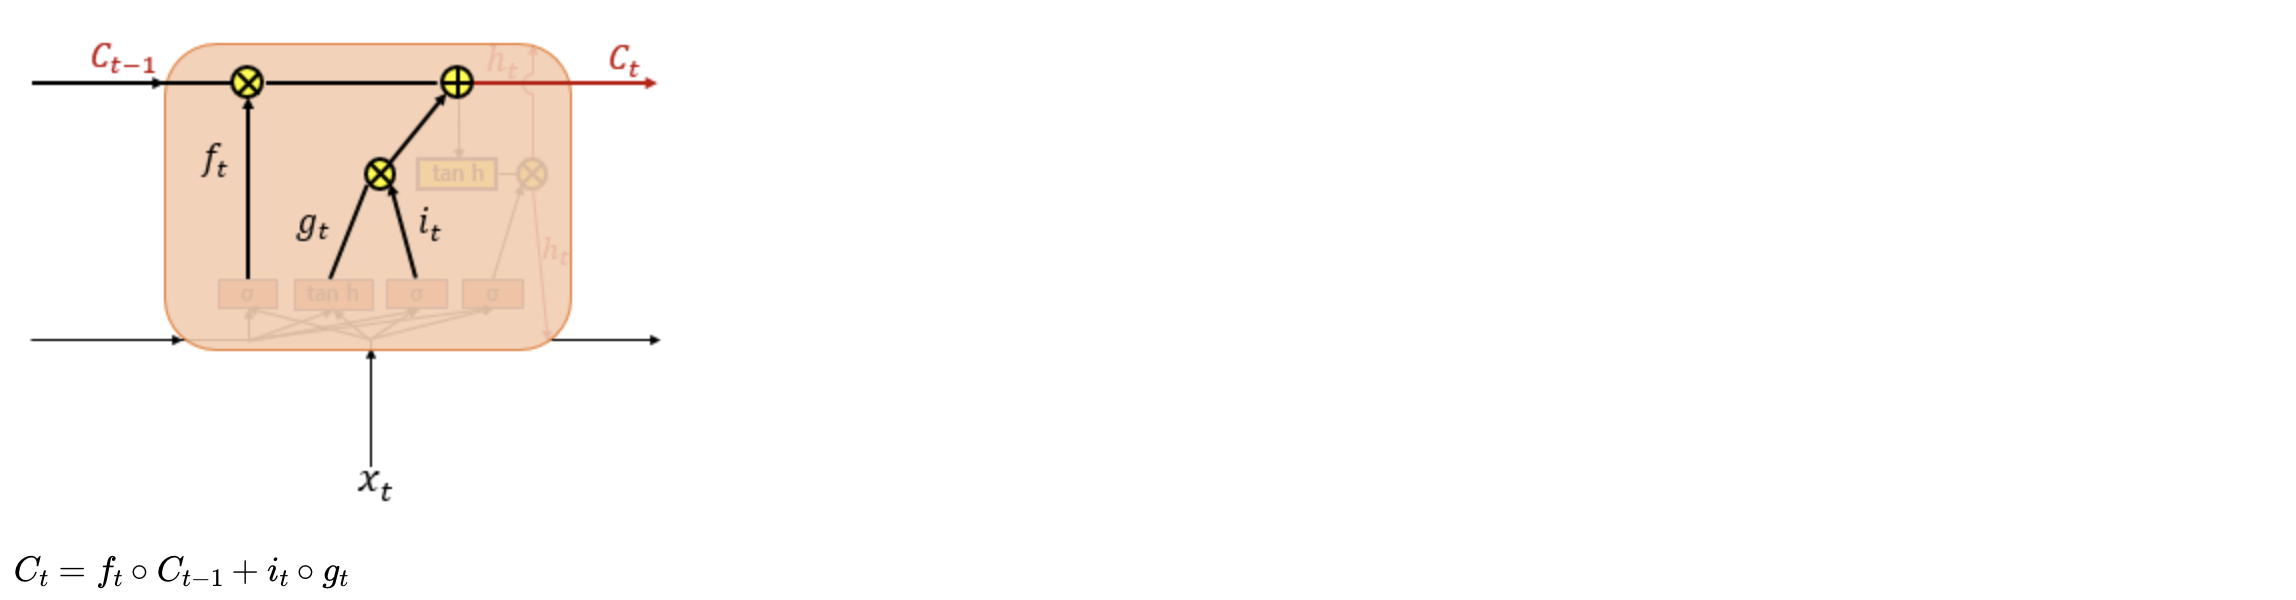
<br><b>삭제 게이트는 기억을 삭제하기 위한 게이트</b><br>
현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지나게 됨<br>
시그모이드 함수를 지나면 0,1 사이의 값이 나오는데, 이 값이 곧 삭제 과정을 거친 정보의 양<br>
<u>0에 가까울수록 정보가 많이 삭제된 것, 1에 가까울수록 정보를 온전히 기억한 것</u><br>

### *3. 셀 상태(장기 상태)*
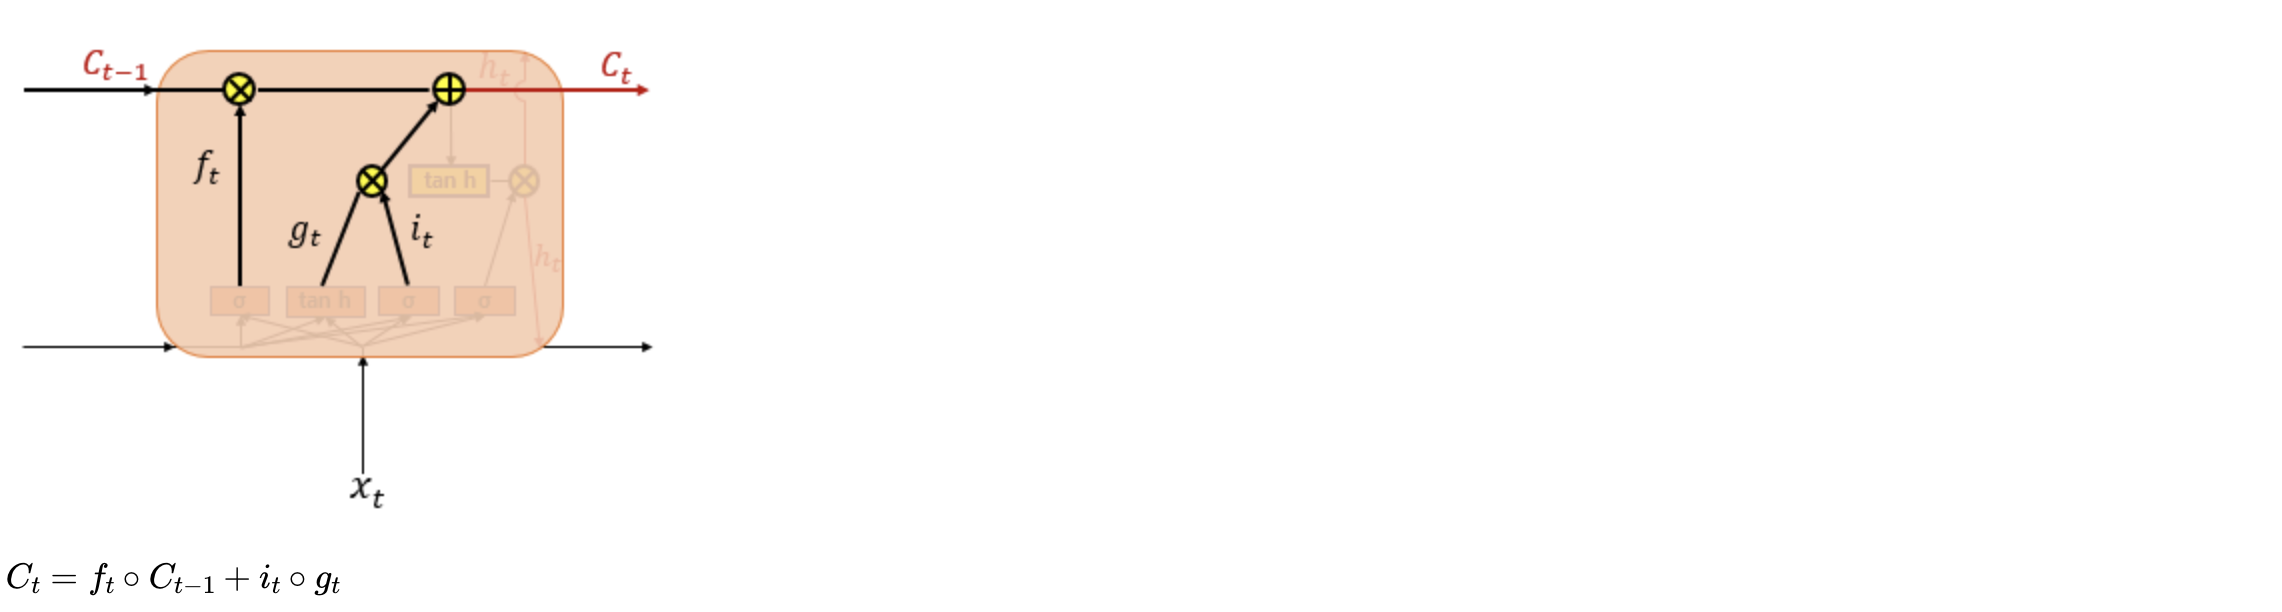
<br>셀 상태 Ct를 LSTM에서는 장기 상태로 부름<br>
삭제 게이트에서 일부 기억을 잃은 상태에서 입력 게이트에서 구한 it, gt이 두 개의 값에 대해 <u>같은 크기의 두 행렬이 있을 때 같은 위치의 성분끼리 곱하는</u> <b>원소별 곱(entrywise product)</b>을 진행.<br><br>
입력 게이트에서 선택된 기억을 삭제 게이트의 결과값에 더함<br>
이 값을 <b>현재 시점 t의 셀 상태</b>라고 하며 이 값은 다음 t+1 시점의 LSTM 셀로 넘겨짐<br>

### *출력 게이트와 은닉 상태(단기 상태)*
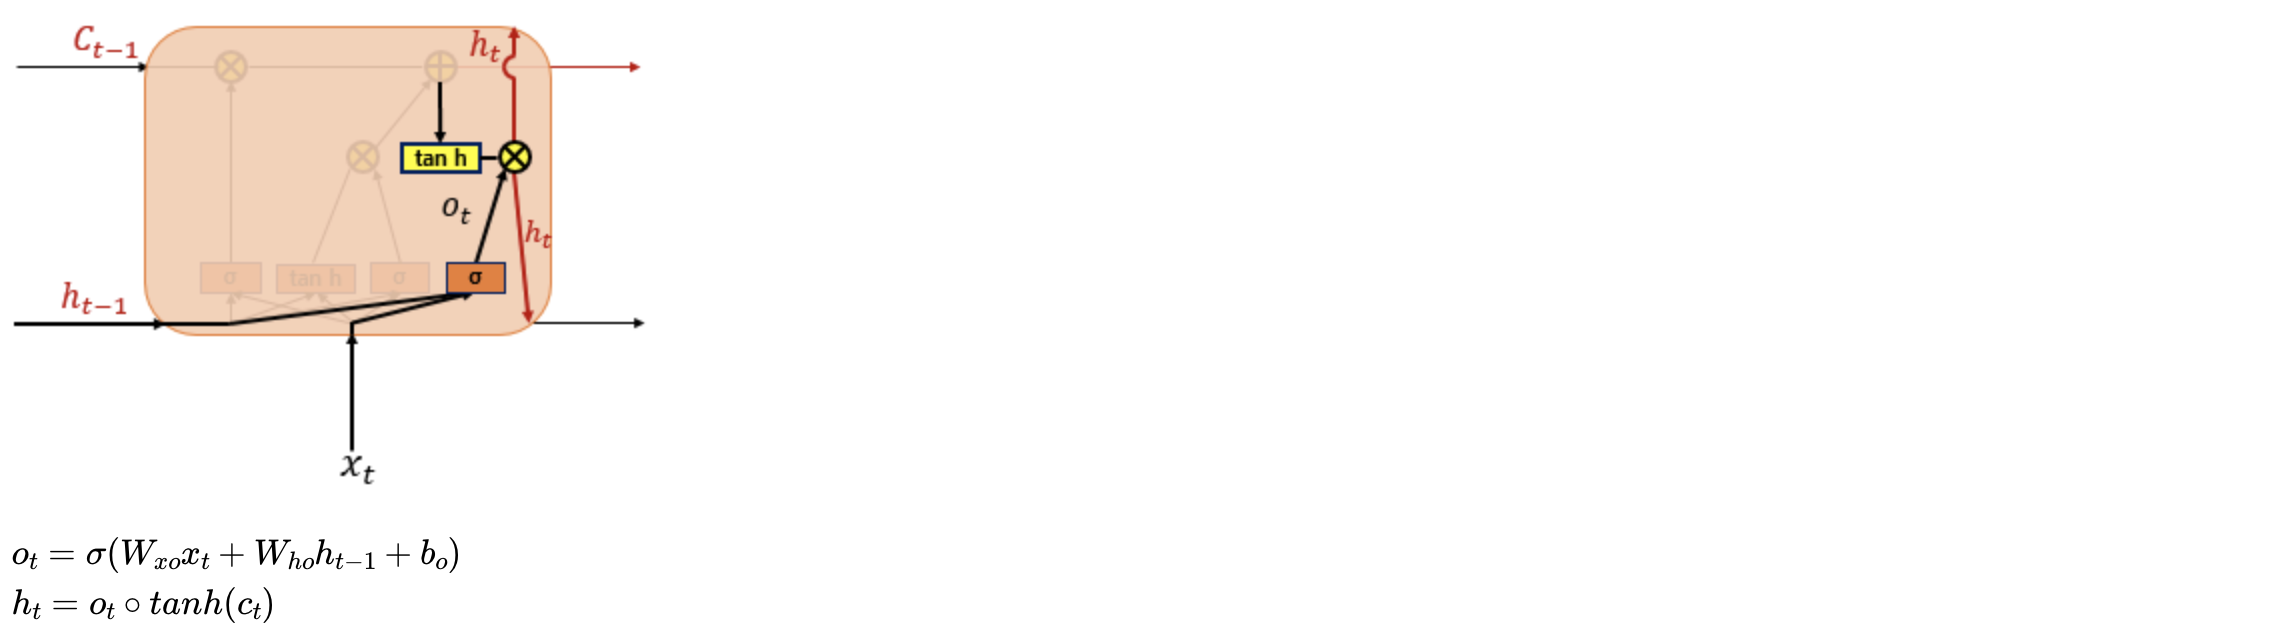
<br><b>출력 게이트는 현재 시점 t의 x값과 이전 시점 t-1의 은닉 상태가 시그모이드 함수를 지닌 값</b><br>
해당 값은 현재 시점 t의 은닉 상태를 결정하는 일에 쓰임<br><br>
은닉 상태를 단기 상태라고도 함<br>
은닉 상태는 장기 상태의 값이 하이퍼볼릭탄젠트 함수를 지나 -1,1 사이의 값<br>
해당 값은 출력 게이트의 값과 연산되면서, 값이 걸러짐<br>
<u>단기 상태의 값 또한 출력층으로도 향함</u>

# 

# *Pytorch nn.LSTM*

In [1]:
import torch
import torch.nn as nn

In [2]:
input_size = 5
hidden_size = 8

batch_size = 1
time_steps = 10
input_size = 5

In [4]:
inputs = torch.Tensor(batch_size, time_steps, input_size)
print(inputs)

tensor([[[-1.7123e-17,  4.5876e-41, -1.7123e-17,  4.5876e-41,  0.0000e+00],
         [ 0.0000e+00,  1.8788e+31,  1.7220e+22,  2.1715e-18,  1.7298e-04],
         [ 2.5966e+20,  8.4713e-07,  4.1721e-08,  3.3587e-06,  1.0980e-05],
         [ 2.6541e+20,  2.5667e-09,  2.6580e-06,  2.1707e-18,  1.6678e+19],
         [ 7.0976e+22,  2.1715e-18,  4.2330e+21,  1.6534e+19,  1.1625e+27],
         [ 1.4580e-19,  7.1856e+22,  4.3605e+27,  1.5766e-19,  2.8776e+29],
         [ 3.1909e-18,  1.2845e+31,  1.8395e+25,  6.1963e-04,  3.3413e+21],
         [ 1.6997e-04,  2.0469e+23,  6.6651e-10,  5.2005e+22,  8.5016e-07],
         [ 6.8253e-07,  2.6330e+20,  3.1061e-18,  1.1963e+22,  3.1097e-18],
         [ 9.4370e-09,  1.0129e-11,  2.5206e-09,  1.6816e-04,  6.7214e-04]]])


In [5]:
cell = nn.LSTM(input_size, hidden_size, batch_first=True)

In [6]:
outputs, _status = cell(inputs)

In [7]:
print(outputs.shape)

torch.Size([1, 10, 8])


In [9]:
print(_status)

(tensor([[[ 0.2955,  0.0024,  0.0189, -0.2115, -0.0190,  0.2208,  0.0675,
           0.1008]]], grad_fn=<StackBackward>), tensor([[[ 0.6197,  0.0046,  0.0399, -0.5542, -0.0753,  0.5787,  0.1550,
           0.1691]]], grad_fn=<StackBackward>))
